<a href="https://www.kaggle.com/code/shreeyashah/regressionfromscratch?scriptVersionId=290911056" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


# Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [3]:
df = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')

In [4]:
# Randomly selecting 1000 rows to train our model
df = df.sample(n=1000, random_state=42)

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [6]:
df.shape

(1000, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 20046 to 18609
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           1000 non-null   float64
 1   latitude            1000 non-null   float64
 2   housing_median_age  1000 non-null   float64
 3   total_rooms         1000 non-null   float64
 4   total_bedrooms      793 non-null    float64
 5   population          1000 non-null   float64
 6   households          1000 non-null   float64
 7   median_income       1000 non-null   float64
 8   median_house_value  1000 non-null   float64
 9   ocean_proximity     1000 non-null   object 
dtypes: float64(9), object(1)
memory usage: 85.9+ KB


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1000.000000,1000.000000,1000.00000,1000.000000,793.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-119.470920,35.525890,28.94100,2633.579000,530.947037,1414.489000,496.880000,3.936266,209696.547000
std,1.968387,2.114536,12.28953,2107.160411,400.451891,1033.306767,361.779353,2.021435,116431.309948
min,-124.150000,32.550000,2.00000,18.000000,3.000000,8.000000,5.000000,0.683100,30000.000000
25%,-121.700000,33.930000,18.75000,1456.750000,302.000000,802.000000,281.000000,2.625000,125525.000000
50%,-118.430000,34.200000,30.00000,2155.500000,434.000000,1174.500000,409.500000,3.502250,181600.000000
75%,-118.010000,37.620000,37.00000,3191.500000,650.000000,1704.250000,603.000000,4.735850,271150.000000
max,-114.590000,41.790000,52.00000,21897.000000,3513.000000,8652.000000,3589.000000,15.000100,500001.000000


## Train Test Split

In [9]:
# Using only 4 features for simplicity: median_income, total_rooms, population , households 
X = df.loc[:, ['median_income','total_rooms', 'population','households']]
y = df.loc[:, 'median_house_value']

In [10]:
# Spliting data into 80% training set and 20% test set
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state = 42)

## Exploratory Data Analysis

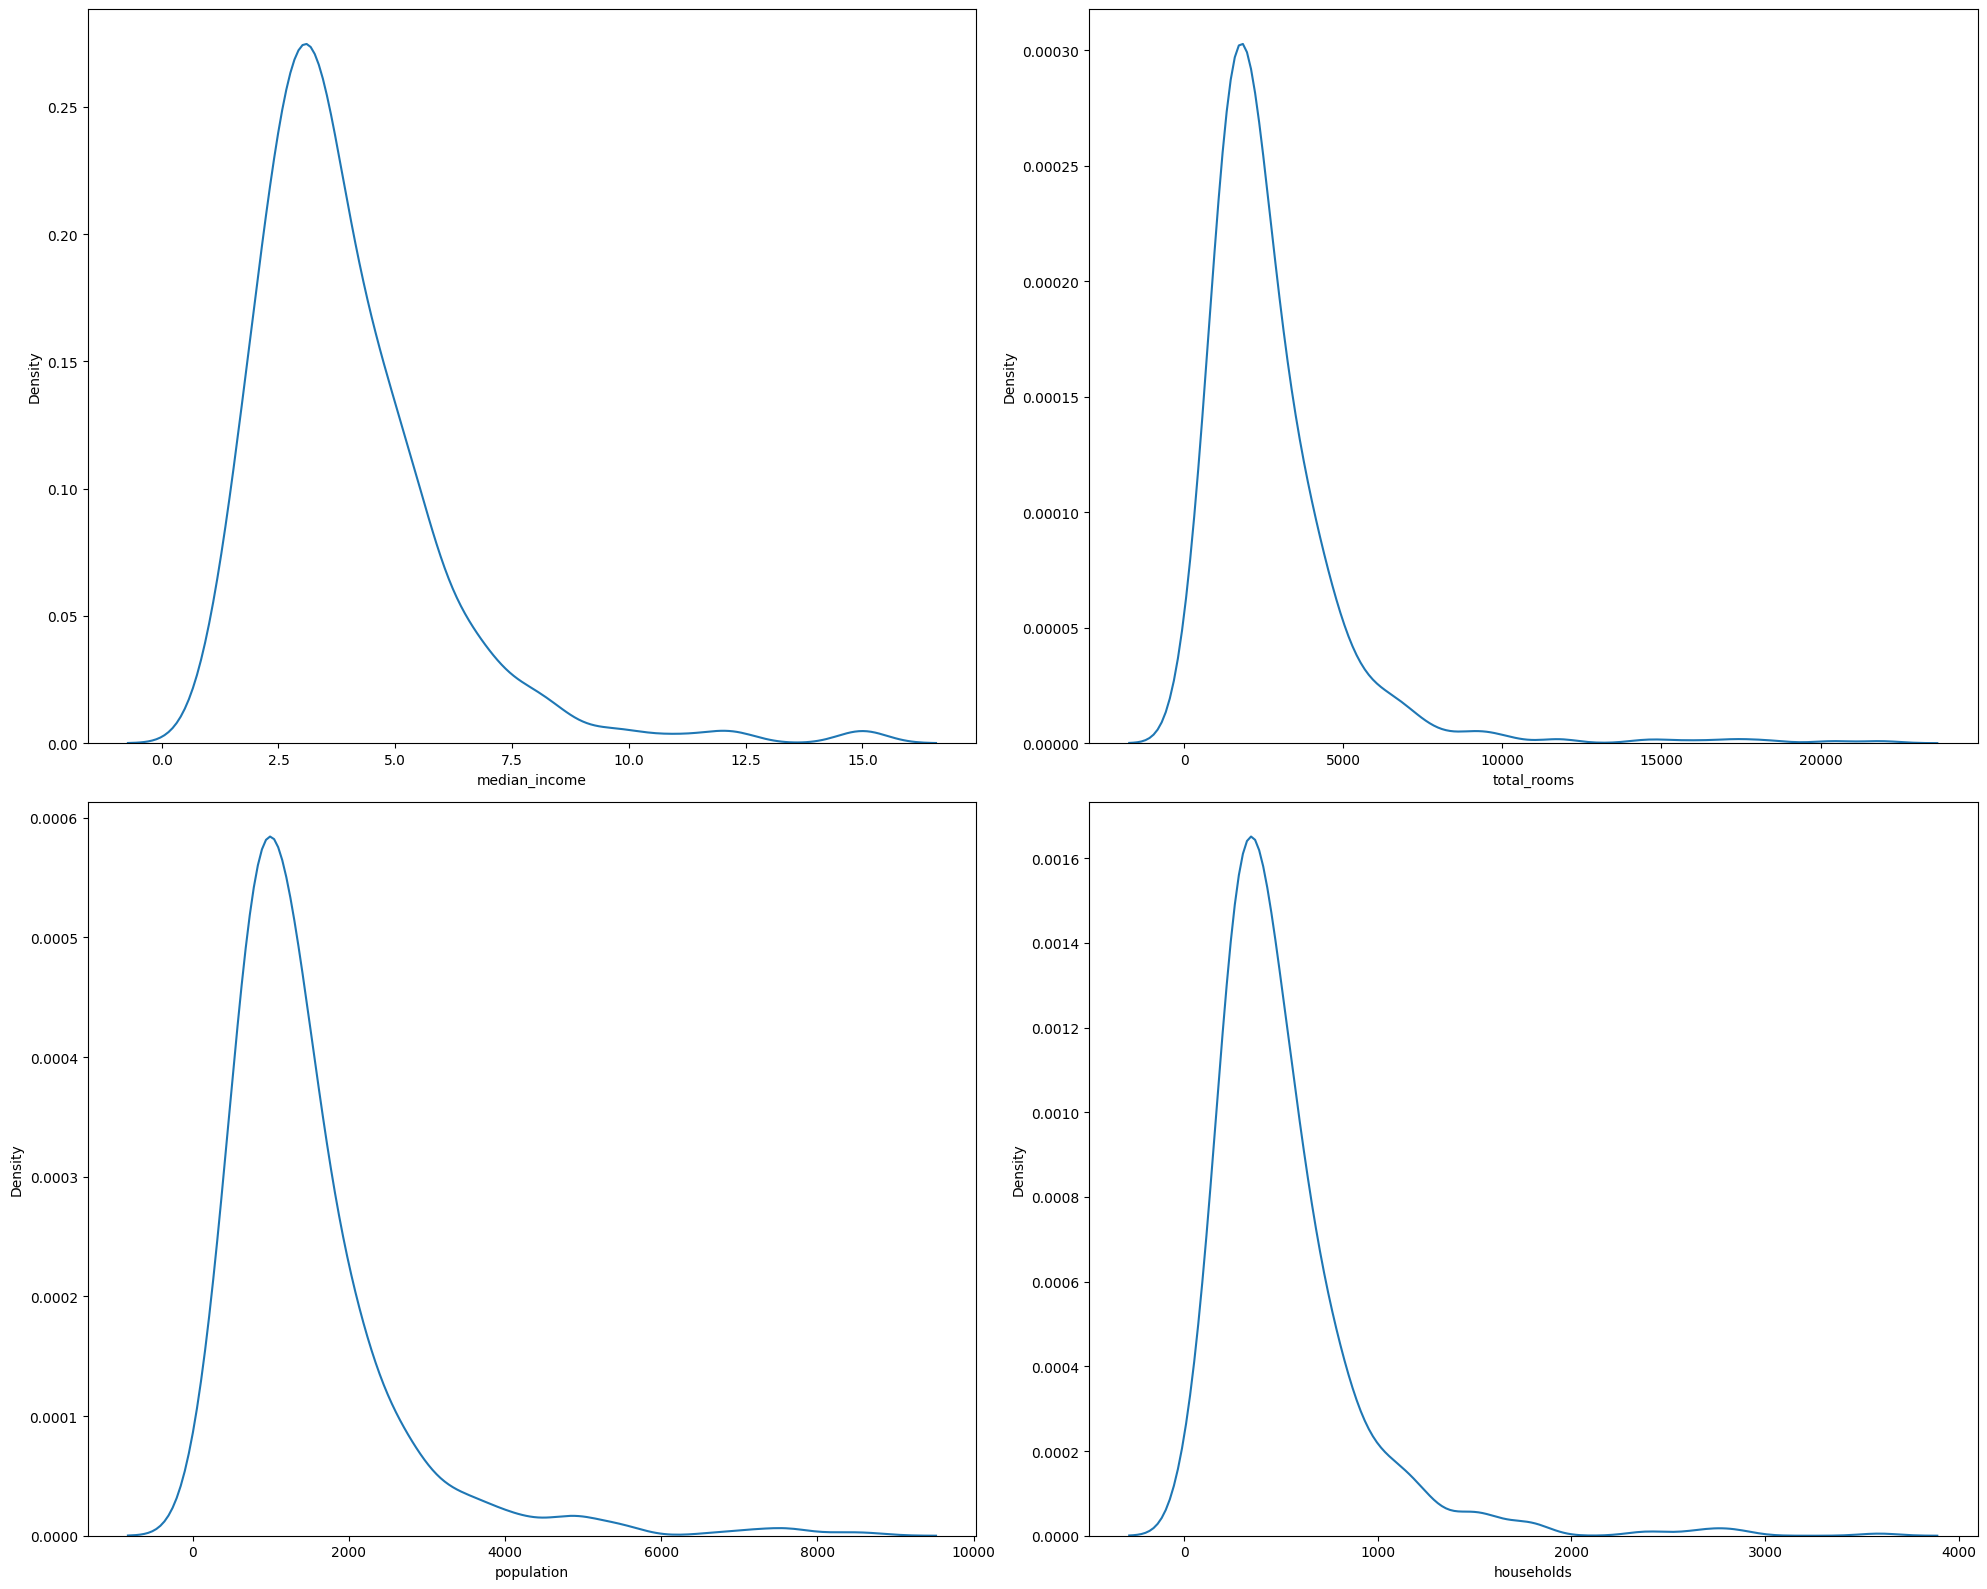

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(20,16))
sns.kdeplot(x=X_train['median_income'], ax=axs[0,0])
sns.kdeplot(x=X_train['total_rooms'], ax = axs[0,1])
sns.kdeplot(x=X_train['population'], ax = axs[1,0])
sns.kdeplot(x=X_train['households'], ax = axs[1,1])

plt.tight_layout()
plt.show()

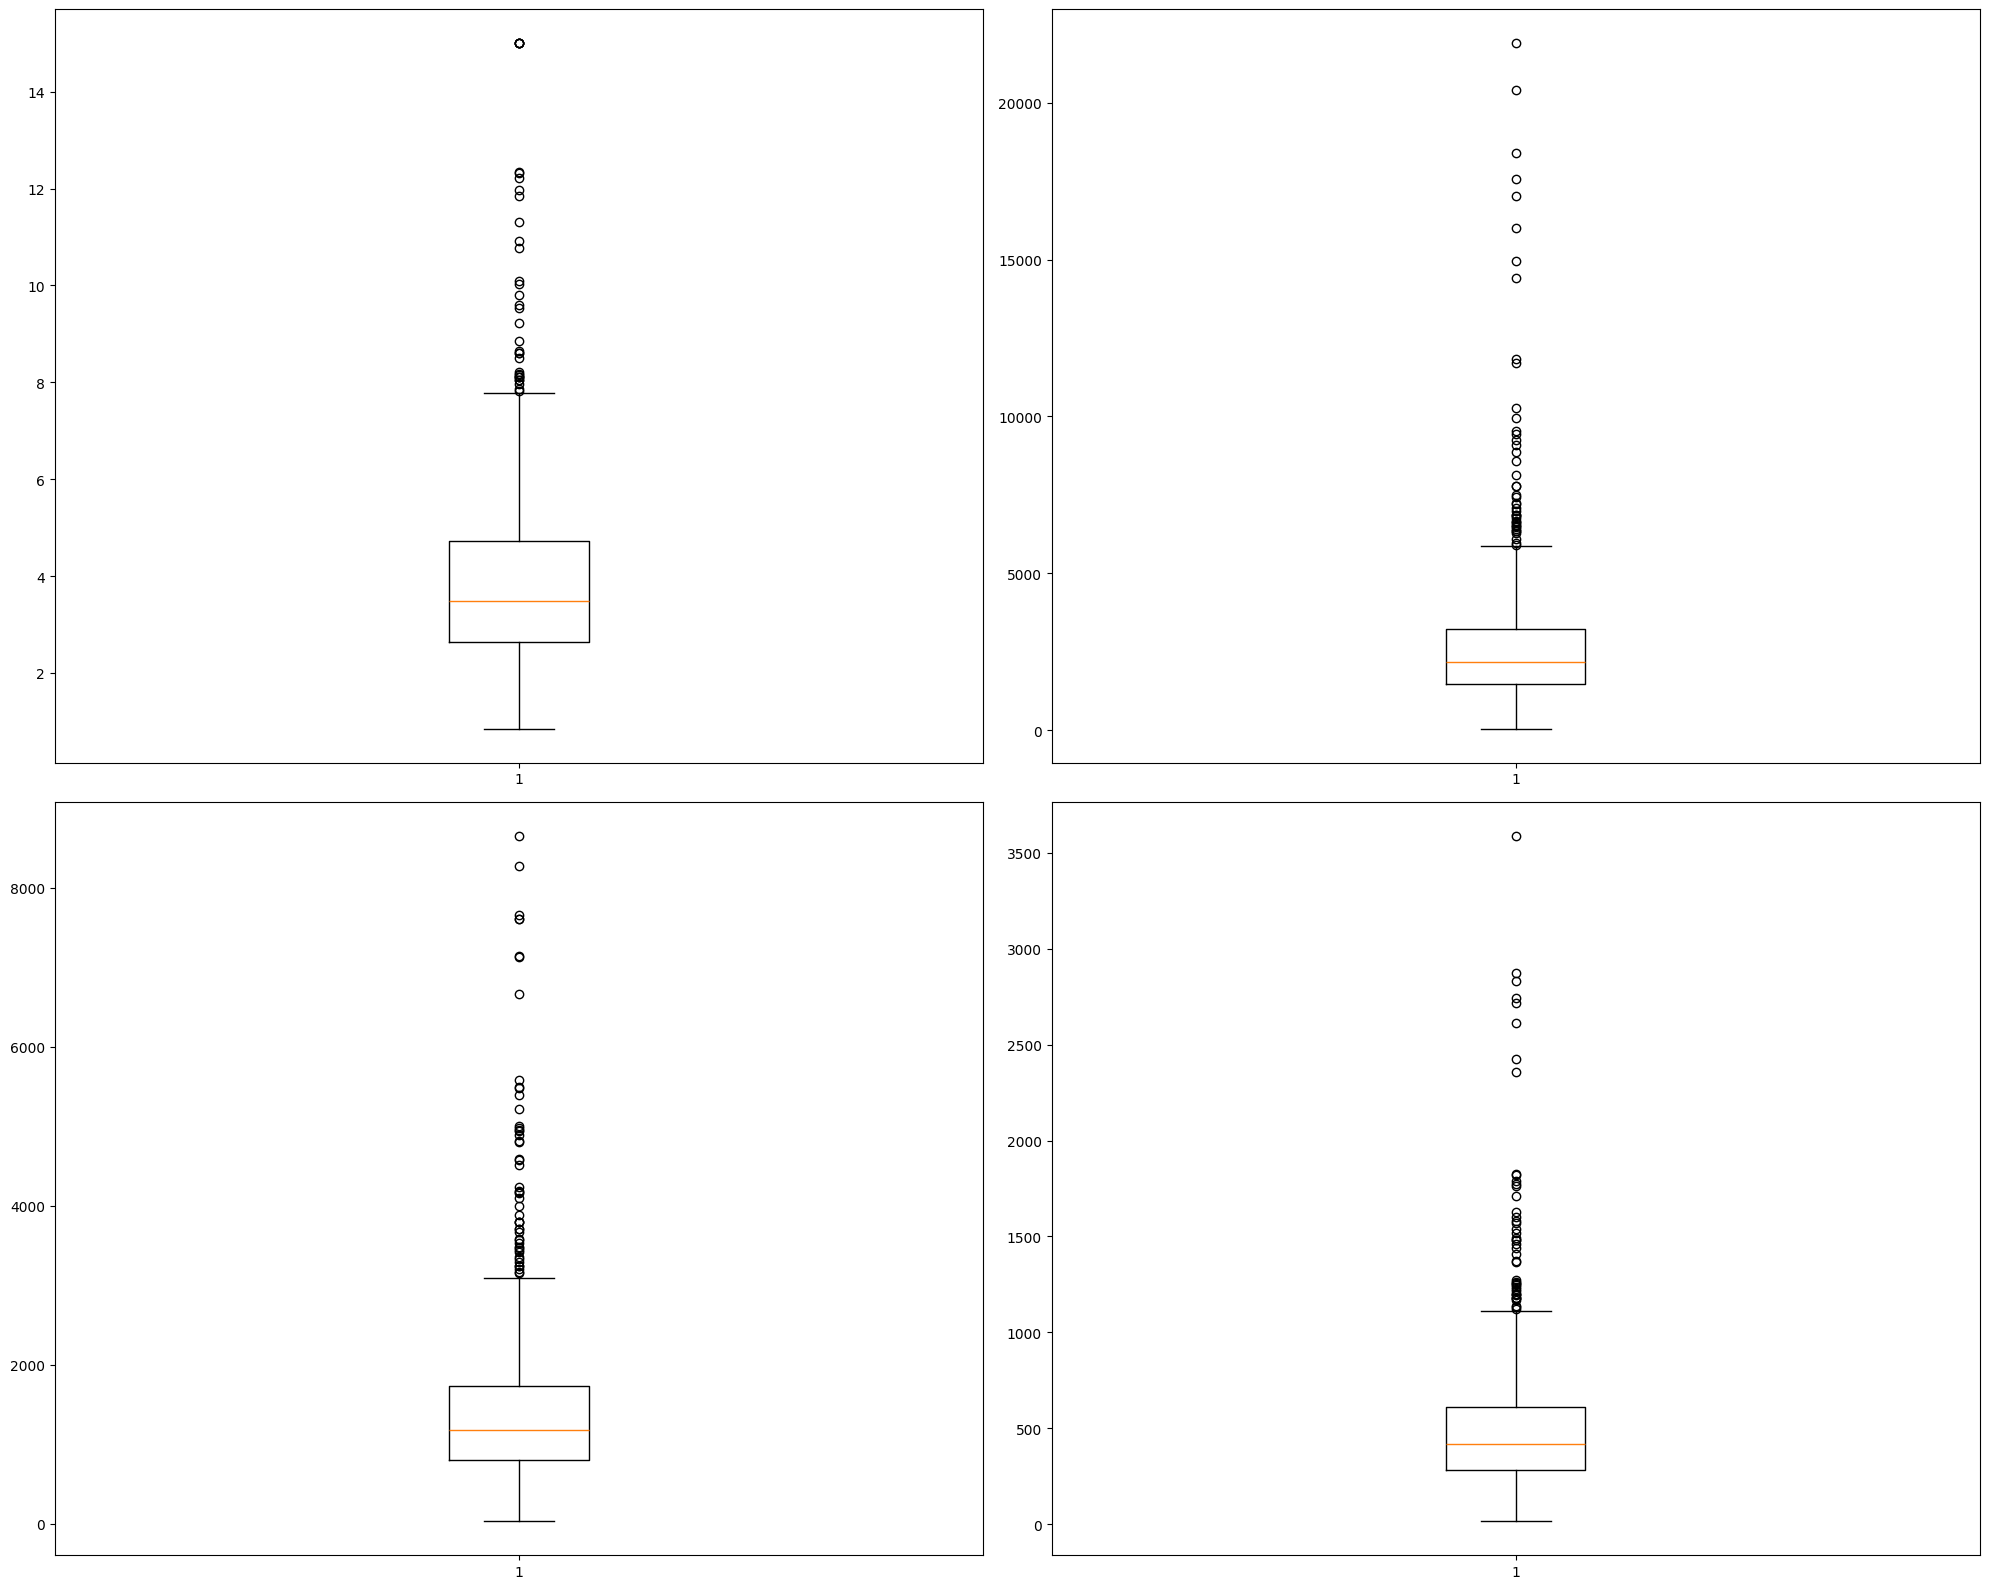

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(20,16))
axs[0,0].boxplot(X_train['median_income'])
axs[0,1].boxplot(X_train['total_rooms'])
axs[1,0].boxplot(X_train['population'])
axs[1,1].boxplot(X_train['households'])

plt.tight_layout()
plt.show()

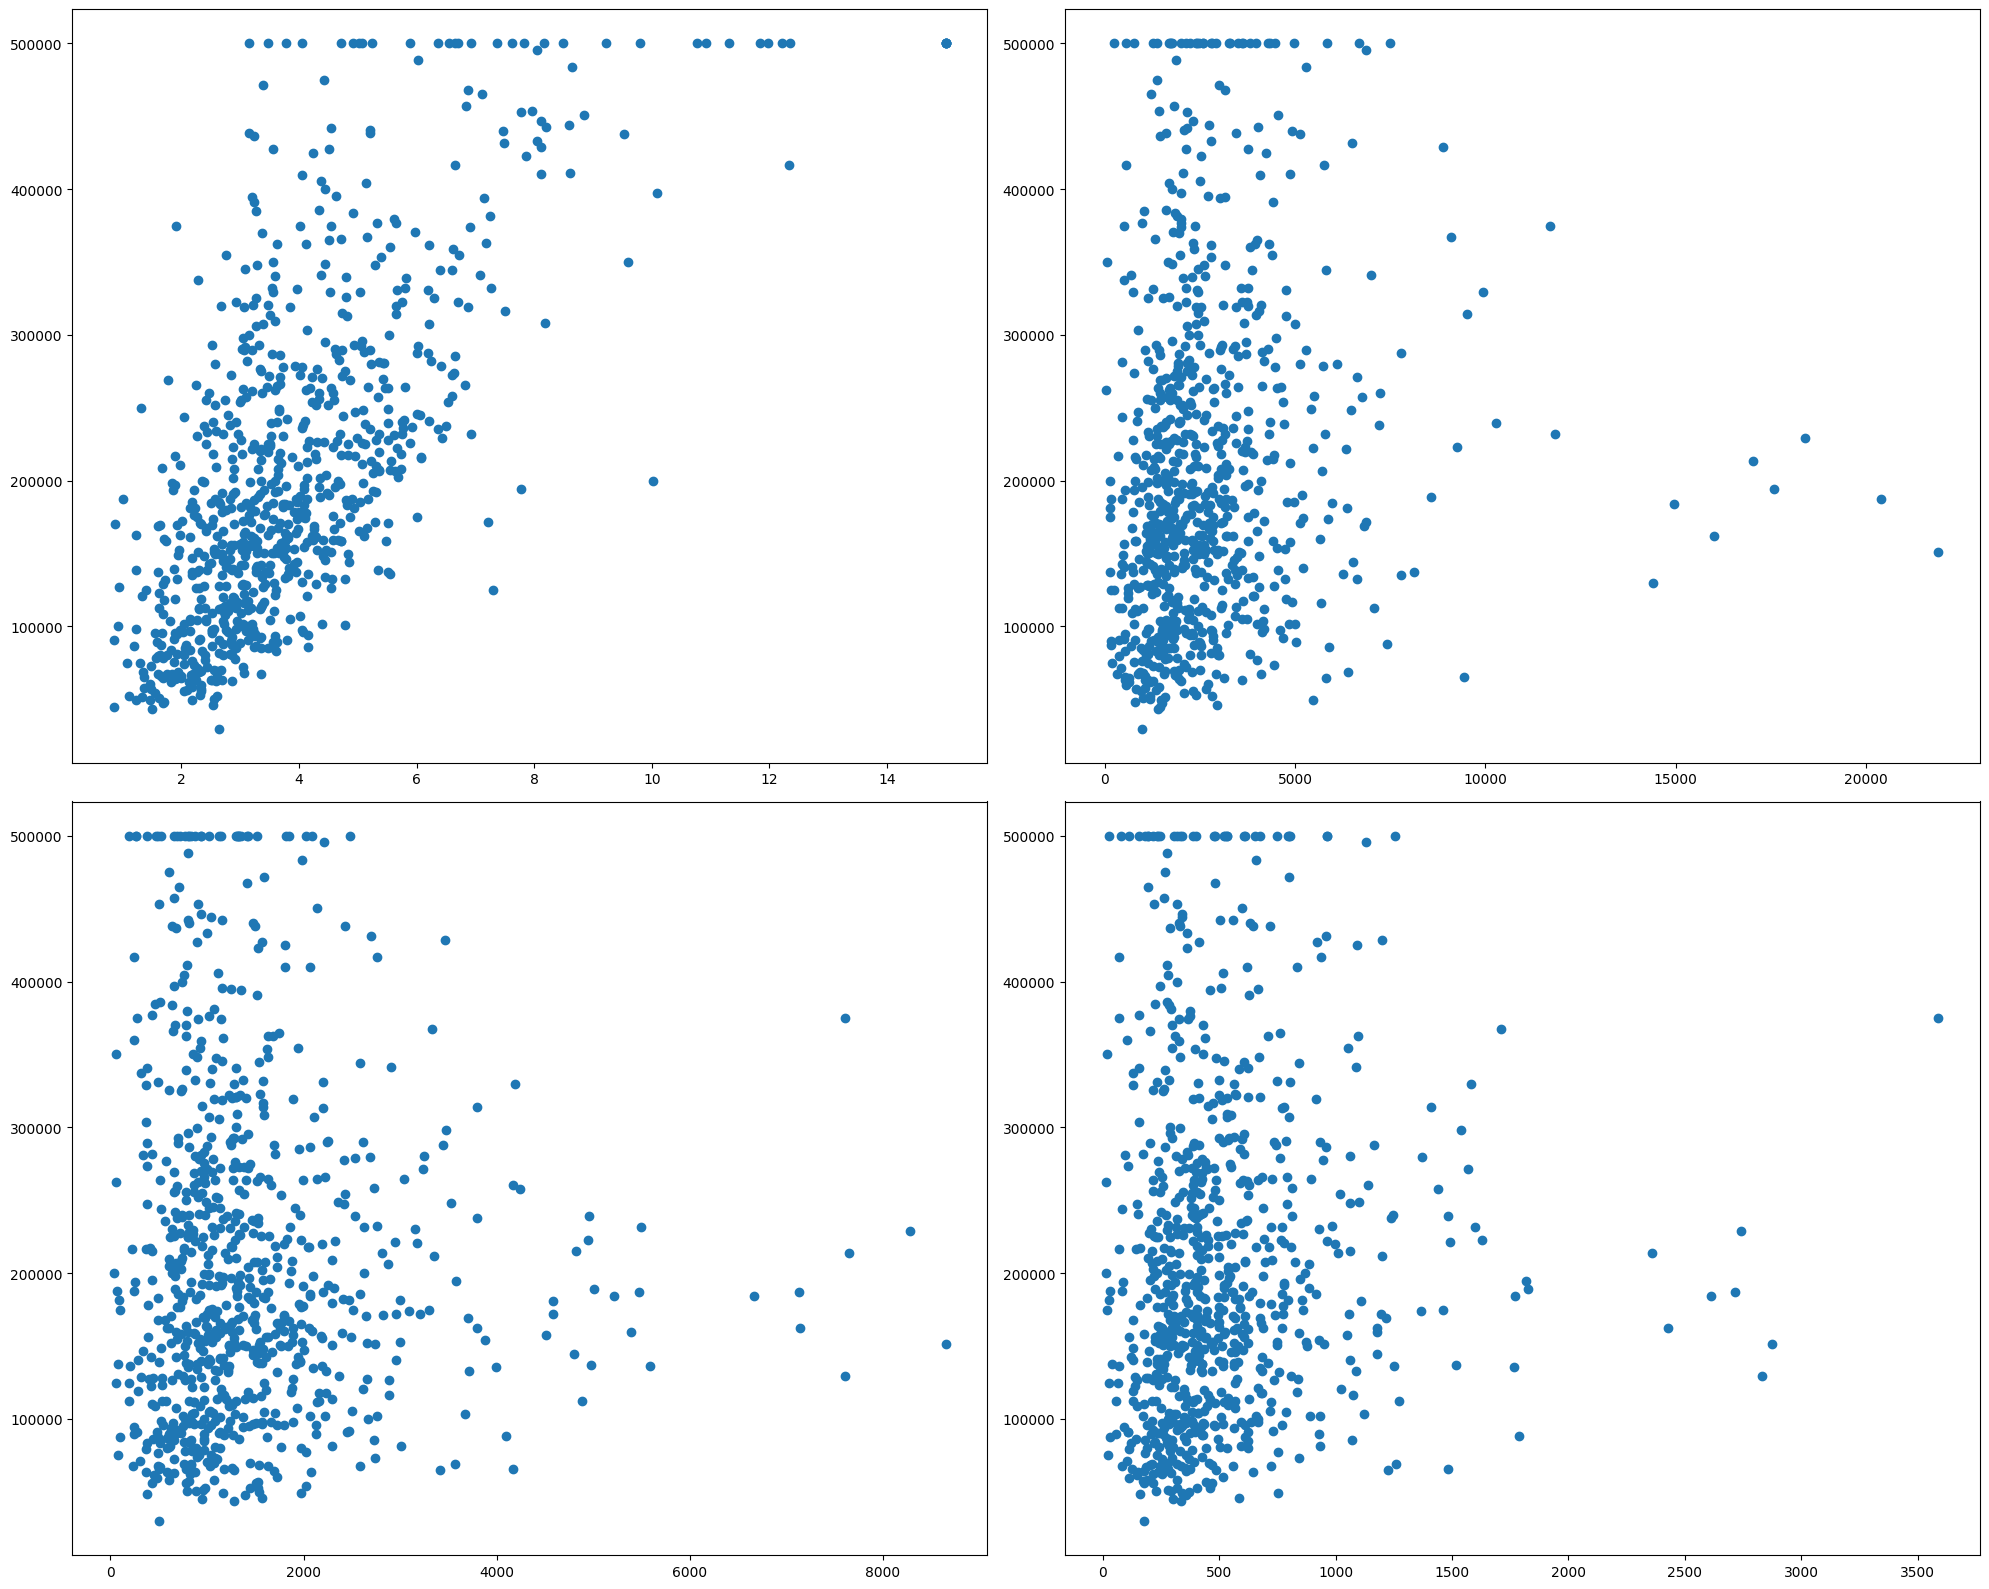

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(20,16))
axs[0,0].scatter(X_train['median_income'], y_train)
axs[0,1].scatter(X_train['total_rooms'], y_train)
axs[1,0].scatter(X_train['population'], y_train)
axs[1,1].scatter(X_train['households'], y_train)

plt.tight_layout()
plt.show()

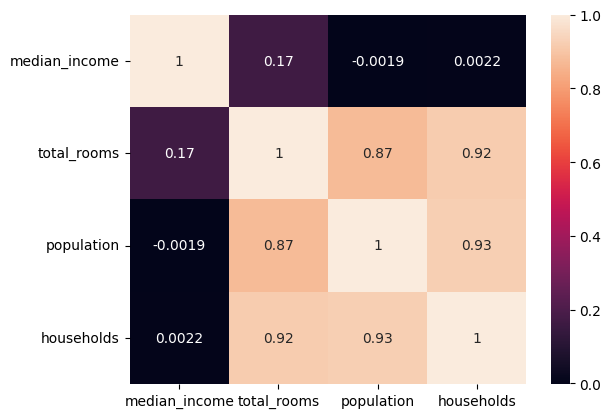

In [14]:
sns.heatmap(X_train.corr(), annot=True)
plt.show()

<Figure size 600x400 with 0 Axes>

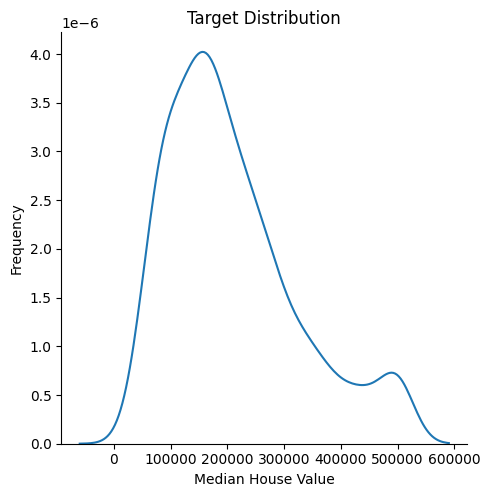

In [15]:
plt.figure(figsize=(6,4))
sns.displot(y_train, kind='kde')
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Target Distribution")
plt.show()

In [16]:
# The independent Variables are skewed and there seems to be some non linear relationship with the target variable.
# Hence, taking polynomial features of degree 2
# Power Trasformer to reduce the skew in data
# Robust Scaler to scale the numerical data and handle outliers

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, PolynomialFeatures, PowerTransformer
from sklearn.pipeline import Pipeline

log_and_scale = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("pow", PowerTransformer()),
    ("scaler", RobustScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", log_and_scale, X_train.columns)
    ],
    remainder="drop"
)

pipe = Pipeline([
    ("preprocessor", preprocessor)
])

In [17]:
X_train_transformed = pipe.fit_transform(X_train, y_train)
X_train_transformed

array([[ 0.97488531,  0.32930373, -0.00893874, ..., -0.00893844,
         0.0077323 ,  0.07864441],
       [-0.31630821, -0.13894715, -0.17661141, ..., -0.17659575,
        -0.34015686, -0.43169607],
       [-0.99211685, -0.90037592, -0.58391863, ..., -0.58379786,
        -0.79165336, -0.90951026],
       ...,
       [ 0.24943014,  0.11919068, -0.03719948, ..., -0.03719789,
        -0.13069151, -0.16289102],
       [ 0.71206003,  0.50081014, -0.08819278, ..., -0.0881875 ,
         0.03044208,  0.2037597 ],
       [ 0.41217019, -0.54765308, -0.81302091, ..., -0.81280957,
        -0.71273636, -0.53731561]])

In [18]:
X_test_transformed = pipe.transform(X_test)
X_test_transformed

array([[ 0.38990847,  0.27912353,  0.1376737 , ...,  0.13767609,
         0.0491512 ,  0.01542046],
       [-0.50496272, -0.95415204, -0.84783586, ..., -0.84760953,
        -0.93250501, -0.9323949 ],
       [-0.10185995, -0.42277185,  0.33052836, ...,  0.33055715,
        -0.02841154, -0.31019764],
       ...,
       [ 0.47810802, -0.32815964, -0.20426847, ..., -0.20424857,
        -0.31831079, -0.36387625],
       [ 0.90283116,  0.01159838, -0.30515356, ..., -0.3051143 ,
        -0.39103871, -0.40741288],
       [ 0.2785717 , -0.91694769, -0.61856412, ..., -0.61843077,
        -0.73455723, -0.7692573 ]])

## Linear Regression

In [19]:
class LinearRegressor:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis = 1)
        B = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = B[0]
        self.coef_ = B[1:]

    def predict(self, X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred

In [20]:
lr = LinearRegressor()
lr.fit(X_train_transformed, y_train)
y_pred = lr.predict(X_test_transformed)

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5068485735836137

In [22]:
lr.coef_

array([  -521056.11863879,  39408719.5397869 , -12568471.94826898,
        -7146301.47488018,    350941.17856623,    844578.93527705,
           79623.87390735,   -307988.34899965, -39724630.73513244,
        -2492415.22660701,   1942395.66742776,  13842927.94182204,
         -364146.00446407,   6751713.13750305])

In [23]:
lr.intercept_

np.float64(219737.15866371794)

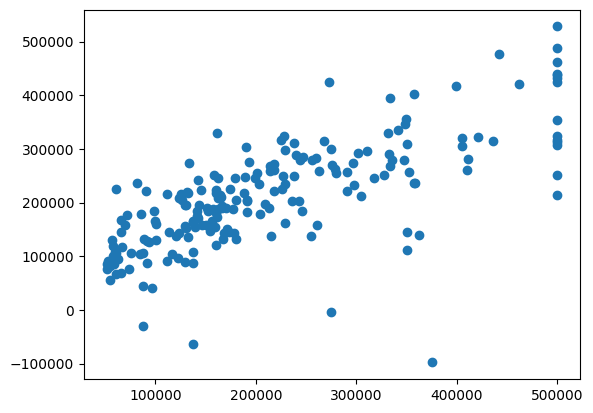

In [24]:
plt.scatter(y_test, y_pred)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train_transformed, y_train)
y_pred = lr.predict(X_test_transformed)

r2_score(y_test, y_pred)

0.5068485730565

In [26]:
lr.coef_

array([  -521056.11872188,  39408719.41774494, -12568471.85622779,
        -7146301.47537372,    350941.1786163 ,    844578.93524892,
           79623.87440909,   -307988.3494514 , -39724630.61266401,
        -2492415.22915238,   1942395.6696121 ,  13842927.85009298,
         -364146.00316927,   6751713.13661942])

In [27]:
lr.intercept_

np.float64(219737.15873365928)

## Batch Gradient Descent

In [28]:
class BatchGDRegressor:
    def __init__(self,learning_rate=0.01,epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis =1)
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            y_hat = np.dot(X_train,self.coef_) 
            coef_der = -2 * np.dot((y_train - y_hat),X_train) / X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)
        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [29]:
bgd = BatchGDRegressor()
bgd.fit(X_train_transformed, y_train)
y_pred = bgd.predict(X_test_transformed)

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.3642624943737083

In [31]:
bgd.coef_

array([ 34300.53486397,     98.62250959, -12690.65340799,   3308.29128547,
        33488.58673813,  19047.9132511 ,   8039.68599008,  20131.80620289,
          113.71497947,  -4259.47910779,   1697.7094584 , -12661.38959657,
        -9810.37516082,   3391.27312412])

In [32]:
bgd.intercept_

np.float64(180240.9486844003)

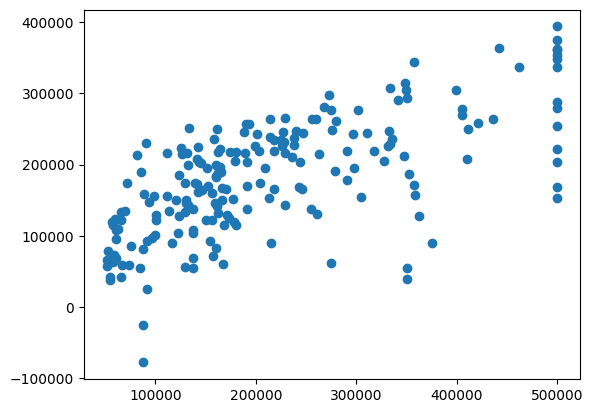

In [33]:
plt.scatter(y_test, y_pred)

## Stochastic Gradient Descent

In [34]:
class SGDRegressor:
    def __init__(self,learning_rate=0.01,epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X_train, y_train):
        self.intercept_ = 0.0
        self.coef_ = np.zeros(X_train.shape[1])
        n = X_train.shape[0]

        for _ in range(self.epochs):
            indices = np.random.permutation(n)
            for idx in indices:
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_

                intercept_der = -2 * (y_train.iloc[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)
                
                coef_der = -2 * np.dot((y_train.iloc[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
        
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [35]:
sgd = SGDRegressor()
sgd.fit(X_train_transformed, y_train)
y_pred = sgd.predict(X_test_transformed)

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5773730875042735

In [37]:
sgd.coef_

array([ -70079.99416311,  -71178.9477483 ,   15466.90441393,
         86841.83434212,  -45015.71522738,  388404.69537997,
        -18610.71640032,   63752.49816727,  -73092.34011214,
       -212802.73432724, -123072.30516935,   17160.30266474,
        -39786.42492773,   88251.73842753])

In [38]:
sgd.intercept_

np.float64(211993.9259186868)

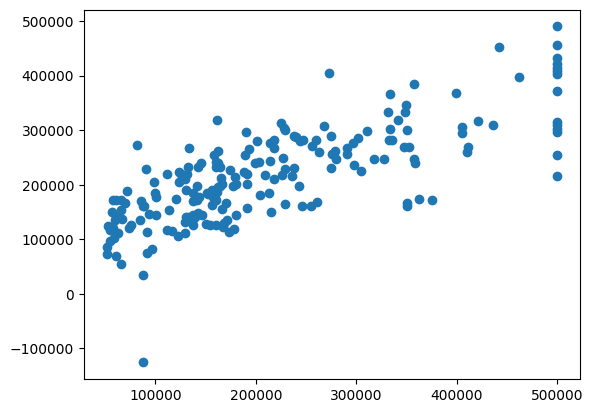

In [39]:
plt.scatter(y_test, y_pred)

In [40]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

sgd = SGDRegressor()
sgd.fit(X_train_transformed, y_train)
y_pred = sgd.predict(X_test_transformed)
r2_score(y_test, y_pred)

0.5323391685155593

In [41]:
sgd.coef_

array([ 30327.07560904, -22607.81803866, -33770.40742411,  37940.87302285,
        29868.9753962 ,  22690.80821847,   4606.76394016,  61817.64626719,
       -22620.74689444, -29414.72147228,   5132.30508949, -33726.19180362,
        -5283.23301716,  38071.86490161])

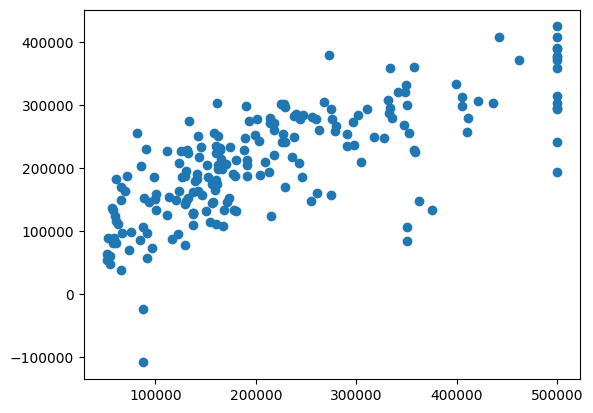

In [42]:
plt.scatter(y_test, y_pred)

## Ridge Redression

In [43]:
class RidgeRegressor:
    def __init__(self, learning_rate = 0.1, epochs = 100, alpha = 0.1):
        self.lr = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis = 1)
        self.coef_ = np.ones(X_train.shape[1])
        XtX = np.dot(X_train.T , X_train)
        Xty = np.dot(X_train.T , y_train)
        n = X_train.shape[0]
        for i in range(self.epochs):
            grad = (2 / n) * (XtX.dot(self.coef_) - Xty)
            grad[1:] += 2*self.alpha*self.coef_[1:]
            self.coef_ -= self.lr * grad
        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]

    def predict(self, X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred

In [44]:
ridge = RidgeRegressor()
ridge.fit(X_train_transformed, y_train)
y_pred = ridge.predict(X_test_transformed)

In [45]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4824391025972192

In [46]:
ridge.coef_

array([ 31509.86747233,  -6899.90938183, -22567.02604685,  16429.55747336,
        31221.09780734,  18499.01657148,   5695.63605875,  35831.99599444,
        -6910.47449329, -15561.08208885,   3865.01227466, -22564.81503691,
        -4492.27260867,  16454.53866373])

In [47]:
ridge.intercept_

np.float64(208218.86980802496)

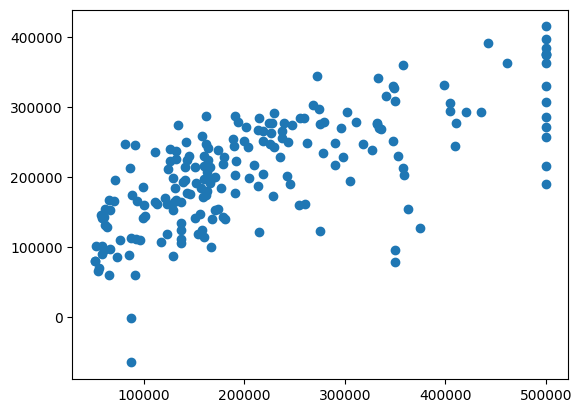

In [48]:
plt.scatter(y_test, y_pred)

In [49]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_transformed, y_train)
y_pred = ridge.predict(X_test_transformed)

r2_score(y_test, y_pred)

0.5711139746606635

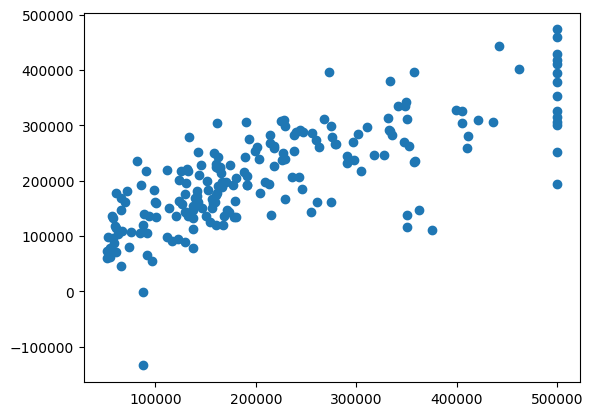

In [50]:
plt.scatter(y_test, y_pred)

In [51]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
lasso = Lasso(max_iter = 10000)
lasso.fit(X_train_transformed, y_train)
y_pred = lasso.predict(X_test_transformed)

r2_score(y_test, y_pred)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.023e+12, tolerance: 1.049e+09
  model = cd_fast.enet_coordinate_descent(


0.5416709407190936